In [1]:
import os
import pandas as pd

root_pth = '/home/ddon0001/PhD/experiments/error_sampling_iter/'
all_ds_path = '/home/ddon0001/PhD/experiments/scaled/no_merges_all/solution_edges_datasets_with_FP.csv'
all_ds = pd.read_csv(all_ds_path)[['ds_name', 'solution_incorrect']]
ds_names = all_ds['ds_name'].unique()
plot_order = all_ds[all_ds.solution_incorrect].ds_name.value_counts().index

In [2]:
original_metrics = pd.read_csv(
    '/home/ddon0001/PhD/experiments/as_ctc/no_merges/no_merge_metrics.csv',
    sep=';'
)[['dataset', 'LNK', 'BIO(0)']]
trackastra_metrics = pd.read_csv(
    '/home/ddon0001/PhD/experiments/trackastra/trackastra_metrics.csv',
    sep=';'
)[['dataset', 'LNK', 'BIO(0)']]

In [52]:
all_ds[all_ds.solution_incorrect].ds_name.value_counts()

ds_name
PhC-C2DL-PSC_01        1161
PhC-C2DL-PSC_02         270
Fluo-N3DH-CE_02         265
Fluo-N3DH-CE_01         230
Fluo-N2DL-HeLa_02       192
BF-C2DL-MuSC_01         134
BF-C2DL-MuSC_02         114
BF-C2DL-HSC_02           84
Fluo-N2DL-HeLa_01        73
Fluo-N2DH-GOWT1_02       20
Fluo-N2DH-SIM+_01        13
BF-C2DL-HSC_01            9
PhC-C2DH-U373_02          8
Fluo-C3DL-MDA231_02       6
DIC-C2DH-HeLa_02          5
Fluo-N2DH-SIM+_02         4
DIC-C2DH-HeLa_01          3
Fluo-N2DH-GOWT1_01        3
Fluo-C3DL-MDA231_01       2
Fluo-C3DH-H157_02         1
Name: count, dtype: int64

In [ ]:
plot_order

In [3]:
def get_ft_name(csv_pth):
    ft_name_list = os.path.basename(csv_pth).split('_')[2:]
    ft_name = '_'.join(ft_name_list).rstrip('.csv')
    return ft_name

In [4]:
from glob import glob

all_csv_pths = glob('**/*.csv', root_dir=root_pth, recursive=True)
all_dist_dfs = []
all_area_dfs = []
all_rank_dfs = []
all_sens_dfs = []
for csv in all_csv_pths:
    ft_name = get_ft_name(csv)
    needed_cols = ['ds_name', 'u', 'v', 'LNK', 'BIO(0)', ft_name]
    pth = os.path.join(root_pth, csv)
    df = pd.read_csv(pth)[needed_cols]
    df[f'edges_presented'] = df.index.values + 1
    ds_name = df['ds_name'].values[0]
    ds_og_metrics = original_metrics[original_metrics['dataset'] == ds_name]
    trackastra_ds_metrics = trackastra_metrics[trackastra_metrics['dataset'] == ds_name]
    df = pd.concat([
        pd.DataFrame({
            'index': 0,
            'ds_name': ds_name,
            'u': -1,
            'v': -1,
            'edges_presented': 0, 
            'LNK': ds_og_metrics['LNK'].values[0], 
            'BIO(0)':ds_og_metrics['BIO(0)'].values[0], 
            ft_name: -1
            }, index=[0]),
        df
    ])
    df.rename(
        columns={
            'LNK': f'{ft_name}_LNK',
            'BIO(0)': f'{ft_name}_BIO(0)',
            'edges_presented': f'{ft_name}_edges_presented'
            },
        inplace=True
    )
    df['trackastra_LNK'] = trackastra_ds_metrics['LNK'].values[0]
    df['trackastra_BIO(0)'] = trackastra_ds_metrics['BIO(0)'].values[0]
    if 'dist' in ft_name:
        all_dist_dfs.append(df)
    elif 'area' in ft_name:
        all_area_dfs.append(df)
    elif 'rank' in ft_name:
        all_rank_dfs.append(df)
    elif 'sens' in ft_name:
        all_sens_dfs.append(df)

In [13]:
resolve_root = '/home/ddon0001/PhD/experiments/resolve_sampling/'
resolve_csv_pths = glob('**/*edges_*.csv', root_dir=resolve_root, recursive=True)


In [66]:
resolve_csv_pths

['Fluo-C3DL-MDA231/02_edges_distance.csv',
 'Fluo-C3DL-MDA231/02_edges_sensitivity_diff.csv',
 'Fluo-C3DL-MDA231/01_edges_sensitivity_diff.csv',
 'Fluo-C3DL-MDA231/01_edges_distance.csv',
 'Fluo-N2DH-GOWT1/02_edges_distance.csv',
 'Fluo-N2DH-GOWT1/02_edges_sensitivity_diff.csv',
 'Fluo-N2DH-GOWT1/01_edges_sensitivity_diff.csv',
 'Fluo-N2DH-GOWT1/01_edges_distance.csv',
 'PhC-C2DH-U373/02_edges_distance.csv',
 'PhC-C2DH-U373/02_edges_sensitivity_diff.csv',
 'Fluo-N2DL-HeLa/02_edges_distance.csv',
 'Fluo-N2DL-HeLa/02_edges_sensitivity_diff.csv',
 'Fluo-N2DL-HeLa/01_edges_sensitivity_diff.csv',
 'Fluo-N2DL-HeLa/01_edges_distance.csv',
 'DIC-C2DH-HeLa/02_edges_distance.csv',
 'DIC-C2DH-HeLa/02_edges_sensitivity_diff.csv',
 'DIC-C2DH-HeLa/01_edges_sensitivity_diff.csv',
 'DIC-C2DH-HeLa/01_edges_distance.csv',
 'BF-C2DL-MuSC/02_edges_distance.csv',
 'BF-C2DL-MuSC/02_edges_sensitivity_diff.csv',
 'BF-C2DL-MuSC/01_edges_sensitivity_diff.csv',
 'BF-C2DL-MuSC/01_edges_distance.csv',
 'BF-C2DL-HS

In [14]:
all_resolve_distance_dfs = []
all_resolve_sensitivity_dfs = []
for csv in resolve_csv_pths:
    ft_name = get_ft_name(csv)
    needed_cols = ['ds_name', 'u', 'v', 'LNK', 'BIO(0)', ft_name]
    pth = os.path.join(resolve_root, csv)
    df = pd.read_csv(pth)[needed_cols]
    df[f'edges_presented'] = df.index.values + 1
    ds_name = df['ds_name'].values[0]
    ds_og_metrics = original_metrics[original_metrics['dataset'] == ds_name]
    df = pd.concat([
        pd.DataFrame({
            'index': 0,
            'ds_name': ds_name,
            'u': -1,
            'v': -1,
            'edges_presented': 0, 
            'LNK': ds_og_metrics['LNK'].values[0], 
            'BIO(0)':ds_og_metrics['BIO(0)'].values[0], 
            ft_name: -1
            }, index=[0]),
        df
    ])
    df.rename(
        columns={
            'LNK': f'{ft_name}_resolve_LNK',
            'BIO(0)': f'{ft_name}_resolve_BIO(0)',
            'edges_presented': f'{ft_name}_resolve_edges_presented'
            },
        inplace=True
    )
    if 'dist' in ft_name:
        all_resolve_distance_dfs.append(df)
    if 'sens' in ft_name:
        all_resolve_sensitivity_dfs.append(df)

In [10]:
ws_root = '/home/ddon0001/PhD/experiments/error_sampling_ws/'
ws_csv_pths = glob('**/*edges_*.csv', root_dir=ws_root, recursive=True)

In [15]:
all_ws_distance_dfs = []
all_ws_sensitivity_dfs = []
for csv in resolve_csv_pths:
    ft_name = get_ft_name(csv)
    needed_cols = ['ds_name', 'u', 'v', 'LNK', 'BIO(0)', ft_name]
    pth = os.path.join(ws_root, csv)
    df = pd.read_csv(pth)[needed_cols]
    df[f'edges_presented'] = df.index.values + 1
    ds_name = df['ds_name'].values[0]
    ds_og_metrics = original_metrics[original_metrics['dataset'] == ds_name]
    df = pd.concat([
        pd.DataFrame({
            'index': 0,
            'ds_name': ds_name,
            'u': -1,
            'v': -1,
            'edges_presented': 0, 
            'LNK': ds_og_metrics['LNK'].values[0], 
            'BIO(0)':ds_og_metrics['BIO(0)'].values[0], 
            ft_name: -1
            }, index=[0]),
        df
    ])
    df.rename(
        columns={
            'LNK': f'{ft_name}_ws_LNK',
            'BIO(0)': f'{ft_name}_ws_BIO(0)',
            'edges_presented': f'{ft_name}_ws_edges_presented'
            },
        inplace=True
    )
    if 'dist' in ft_name:
        all_ws_distance_dfs.append(df)
    if 'sens' in ft_name:
        all_ws_sensitivity_dfs.append(df)

In [16]:
all_dist_df = pd.concat(all_dist_dfs)
all_sens_df = pd.concat(all_sens_dfs)
all_resolve_dist_df = pd.concat(all_resolve_distance_dfs)
all_resolve_sens_df = pd.concat(all_resolve_sensitivity_dfs)
all_ws_dist_df = pd.concat(all_ws_distance_dfs)
all_ws_sens_df = pd.concat(all_ws_sensitivity_dfs)

In [25]:
all_df = all_dist_df
for df in [all_sens_df, all_ws_dist_df, all_ws_sens_df, all_resolve_dist_df, all_resolve_sens_df]:
    cols_to_use = df.columns.difference(all_df.columns)
    all_df = pd.merge(all_df, df)
all_df.head()
    

,index,ds_name,u,v,distance_edges_presented,distance_LNK,distance_BIO(0),distance,trackastra_LNK,trackastra_BIO(0),...,distance_ws_BIO(0),sensitivity_diff_ws_edges_presented,sensitivity_diff_ws_LNK,sensitivity_diff_ws_BIO(0),distance_resolve_edges_presented,distance_resolve_LNK,distance_resolve_BIO(0),sensitivity_diff_resolve_edges_presented,sensitivity_diff_resolve_LNK,sensitivity_diff_resolve_BIO(0)
0,0.0,Fluo-C3DL-MDA231_02,-1,-1,0,0.974116,0.605784,-1.000000,0.967172,0.591802,...,0.605784,0,0.974116,0.605784,0,0.974116,0.605784,0,0.974116,0.605784
1,NaN,Fluo-C3DL-MDA231_02,58,111,1,0.974116,0.605784,53.932830,0.967172,0.591802,...,0.605784,5,0.974116,0.605784,1,0.974116,0.605784,5,0.974116,0.605784
2,NaN,Fluo-C3DL-MDA231_02,94,147,2,0.974116,0.605784,48.379212,0.967172,0.591802,...,0.605784,372,0.991162,0.640499,2,0.974116,0.605784,372,0.989899,0.637460
3,NaN,Fluo-C3DL-MDA231_02,147,199,3,0.974116,0.605784,43.053904,0.967172,0.591802,...,0.605784,312,0.991162,0.640499,3,0.974116,0.605784,312,0.989899,0.637460
4,NaN,Fluo-C3DL-MDA231_02,111,161,4,0.974116,0.605784,39.131203,0.967172,0.591802,...,0.605784,162,0.991162,0.640499,4,0.974116,0.605784,162,0.989899,0.637460


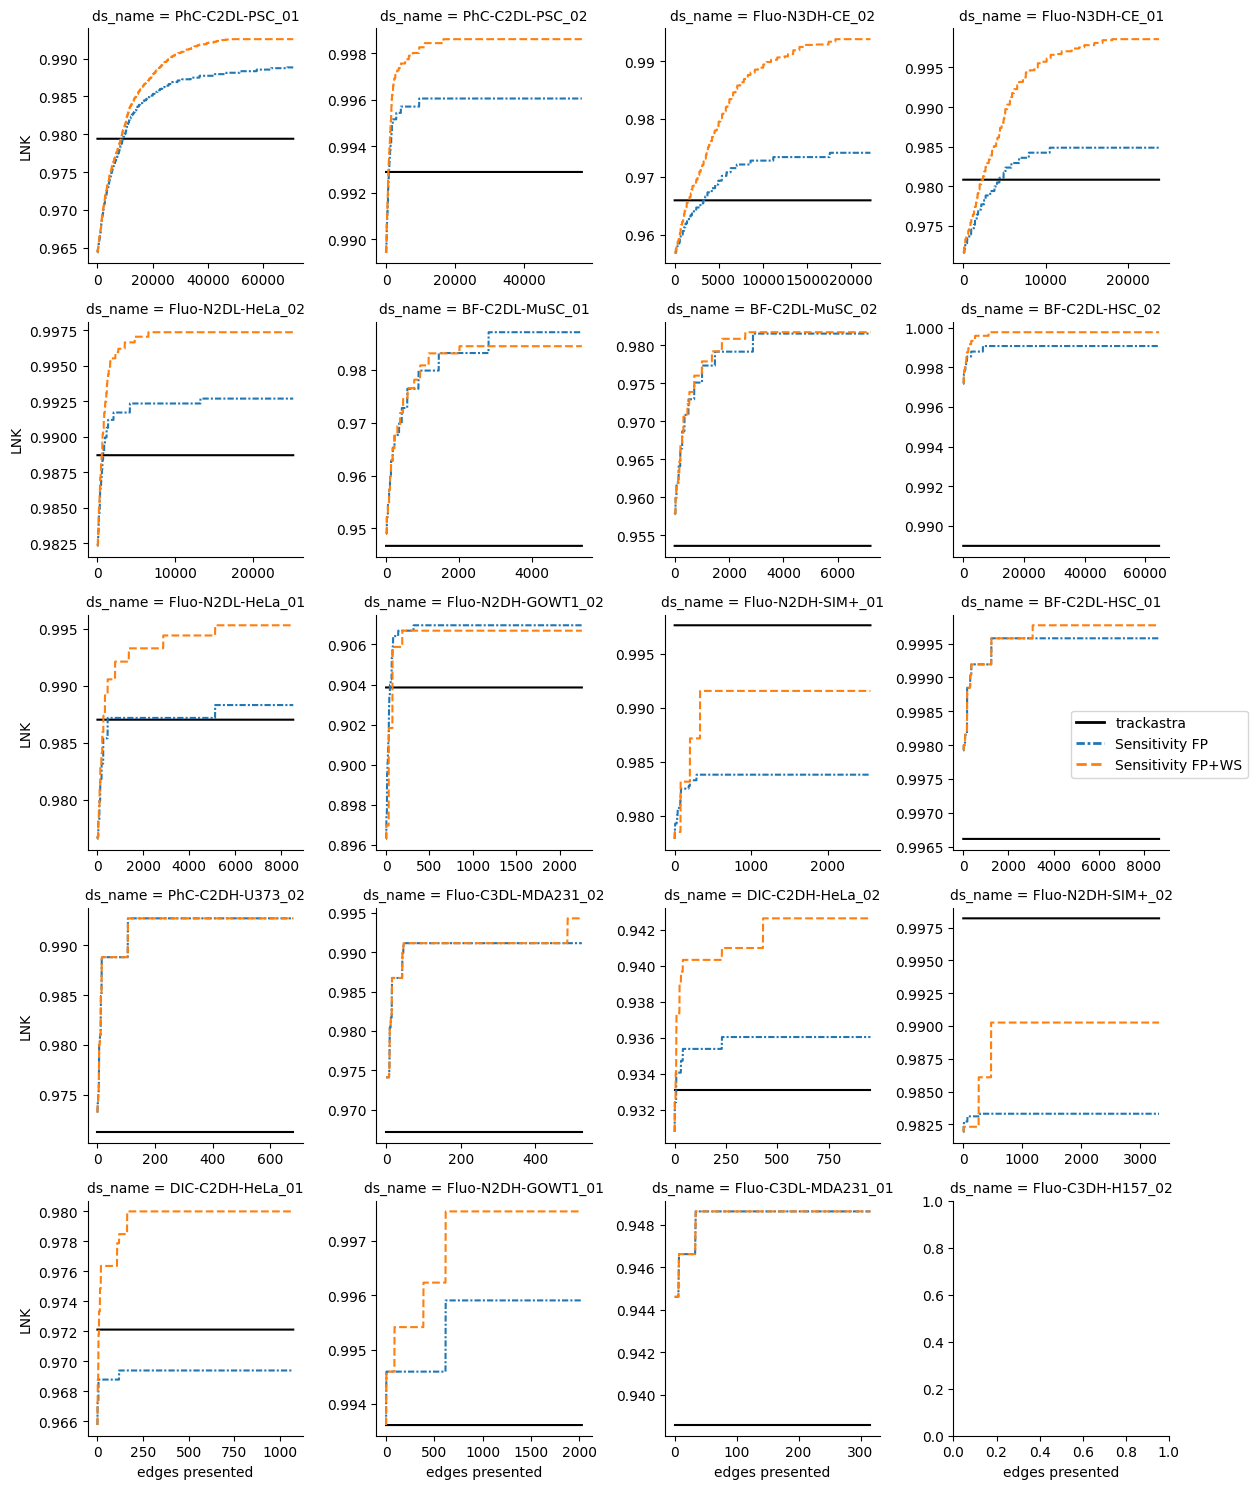

In [20]:
from matplotlib.lines import Line2D
import numpy as np
import seaborn as sns

grid = sns.FacetGrid(all_df, col='ds_name', col_wrap=4, sharex=False, sharey=False, col_order=plot_order)
grid.map_dataframe(sns.lineplot, x='distance_edges_presented', y='trackastra_LNK', color='black')

# grid.map_dataframe(sns.lineplot, x='distance_edges_presented', y='distance_LNK', color=sns.color_palette()[0], linestyle=(0, (3, 1, 1, 1)))
# grid.map_dataframe(sns.lineplot, x='distance_resolve_edges_presented', y='distance_resolve_LNK', color=sns.color_palette()[1], linestyle='--')
# grid.map_dataframe(sns.lineplot, x='distance_ws_edges_presented', y='distance_ws_LNK', color=sns.color_palette()[1], linestyle='--')

grid.map_dataframe(sns.lineplot, x='sensitivity_diff_edges_presented', y='sensitivity_diff_LNK', color=sns.color_palette()[0], linestyle=(0, (3, 1, 1, 1)))
# grid.map_dataframe(sns.lineplot, x='sensitivity_diff_resolve_edges_presented', y='sensitivity_diff_resolve_LNK', color=sns.color_palette()[1], linestyle='--')
grid.map_dataframe(sns.lineplot, x='sensitivity_diff_ws_edges_presented', y='sensitivity_diff_ws_LNK', color=sns.color_palette()[1], linestyle='--')


# Create custom legend labels
custom_lines = [
    Line2D([0], [0], color='black', lw=2),
    Line2D([0], [0], color=sns.color_palette()[0], lw=2, linestyle=(0, (3, 1, 1, 1))),
    Line2D([0], [0], color=sns.color_palette()[1], lw=2, linestyle='--'),
    # Line2D([0], [0], color=sns.color_palette()[1], lw=2, linestyle='--'),
    # Line2D([0], [0], color=sns.color_palette()[3], lw=2, linestyle='-.')
]

# Add legend to the figure
grid.figure.legend(custom_lines, ['trackastra', 'Sensitivity FP', 'Sensitivity FP+WS'], loc='center right', bbox_to_anchor=(1.05, 0.5))
grid.set_xlabels('edges presented')
grid.set_ylabels('LNK')

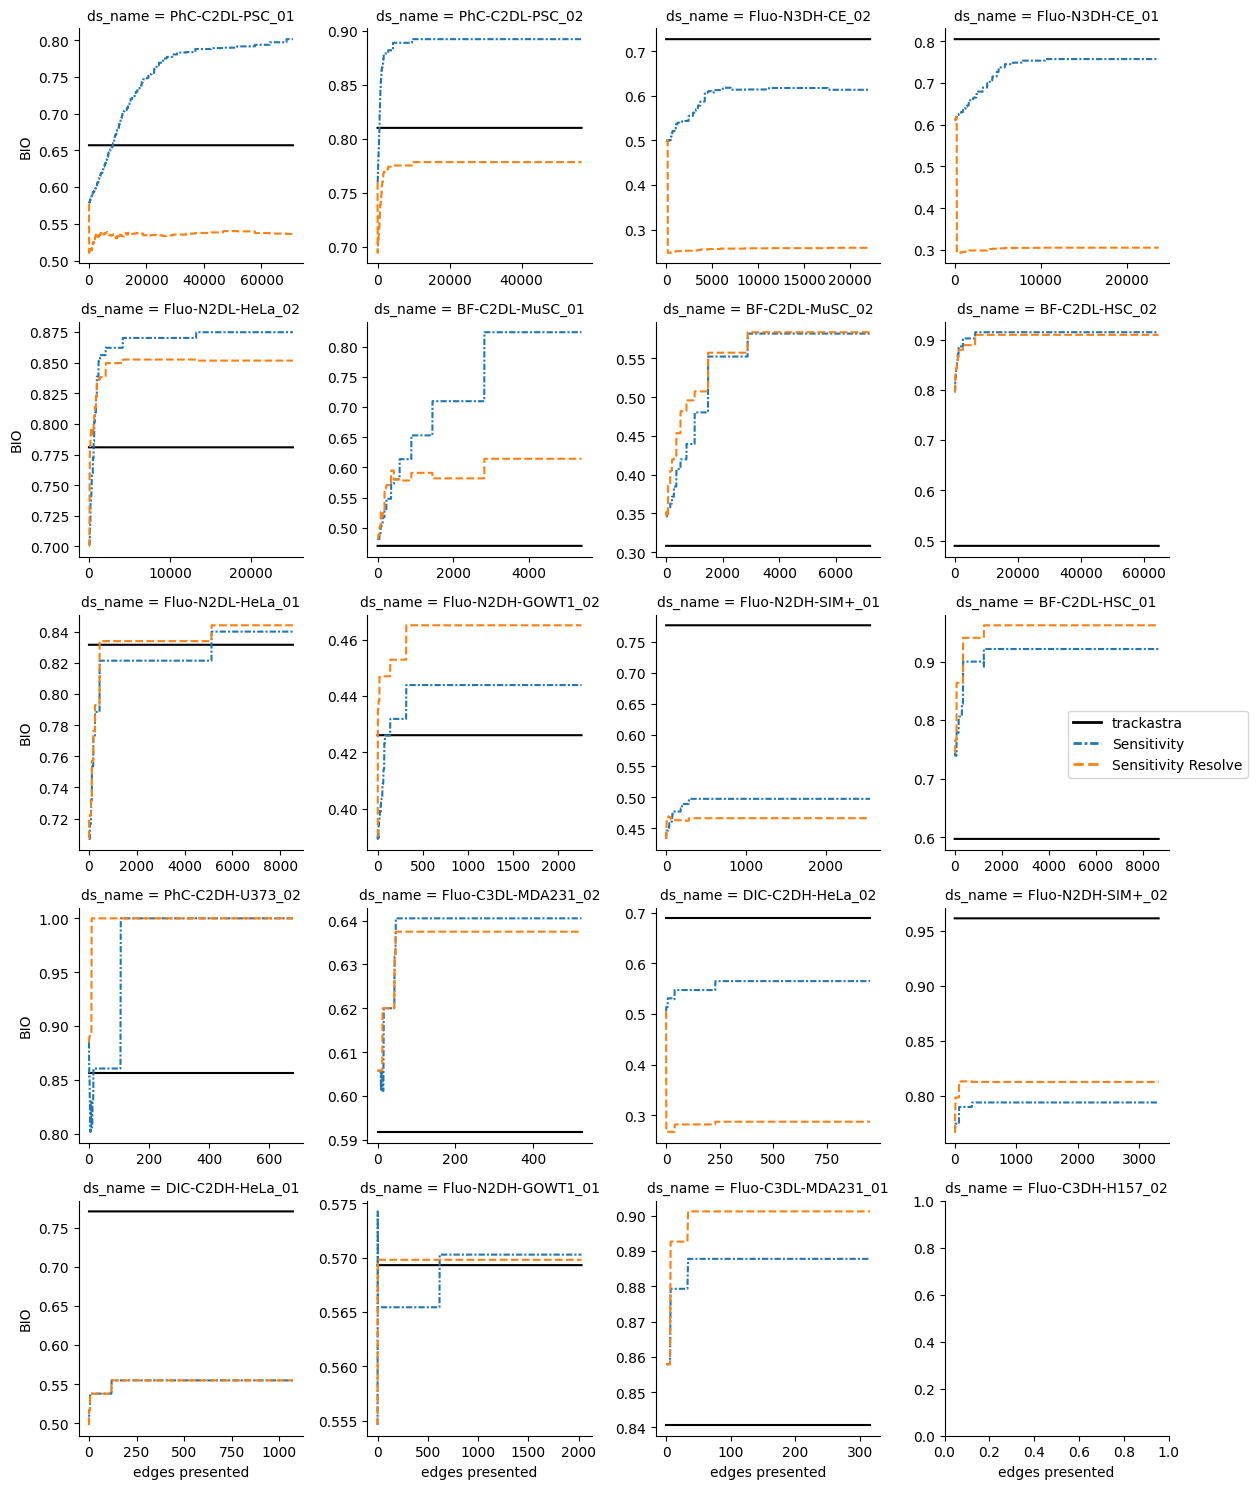

In [26]:
import seaborn as sns

grid = sns.FacetGrid(all_df, col='ds_name', col_wrap=4, sharex=False, sharey=False, col_order=plot_order)
grid.map_dataframe(sns.lineplot, x='distance_edges_presented', y='trackastra_BIO(0)', color='black')

# grid.map_dataframe(sns.lineplot, x='distance_edges_presented', y='distance_BIO(0)', color=sns.color_palette()[0], linestyle=(0, (3, 1, 1, 1)))
# grid.map_dataframe(sns.lineplot, x='distance_ws_edges_presented', y='distance_ws_BIO(0)', color=sns.color_palette()[1], linestyle=('--'))
# grid.map_dataframe(sns.lineplot, x='distance_resolve_edges_presented', y='distance_resolve_BIO(0)', color=sns.color_palette()[1], linestyle=('--'))

grid.map_dataframe(sns.lineplot, x='sensitivity_diff_edges_presented', y='sensitivity_diff_BIO(0)', color=sns.color_palette()[0], linestyle=(0, (3, 1, 1, 1)))
# grid.map_dataframe(sns.lineplot, x='sensitivity_diff_ws_edges_presented', y='sensitivity_diff_ws_BIO(0)', color=sns.color_palette()[1], linestyle=('--'))
grid.map_dataframe(sns.lineplot, x='sensitivity_diff_resolve_edges_presented', y='sensitivity_diff_resolve_BIO(0)', color=sns.color_palette()[1], linestyle=('--'))


# Create custom legend labels
custom_lines = [
    Line2D([0], [0], color='black', lw=2),
    Line2D([0], [0], color=sns.color_palette()[0], lw=2, linestyle=(0, (3, 1, 1, 1))),
    Line2D([0], [0], color=sns.color_palette()[1], lw=2, linestyle='--'),
    # Line2D([0], [0], color=sns.color_palette()[2], lw=2, linestyle=':'),
    # Line2D([0], [0], color=sns.color_palette()[3], lw=2, linestyle='-.')
]

# Add legend to the figure
grid.figure.legend(custom_lines, ['trackastra', 'Sensitivity', 'Sensitivity Resolve'], loc='center right', bbox_to_anchor=(1.05, 0.5))
grid.set_xlabels('edges presented')
grid.set_ylabels('BIO')

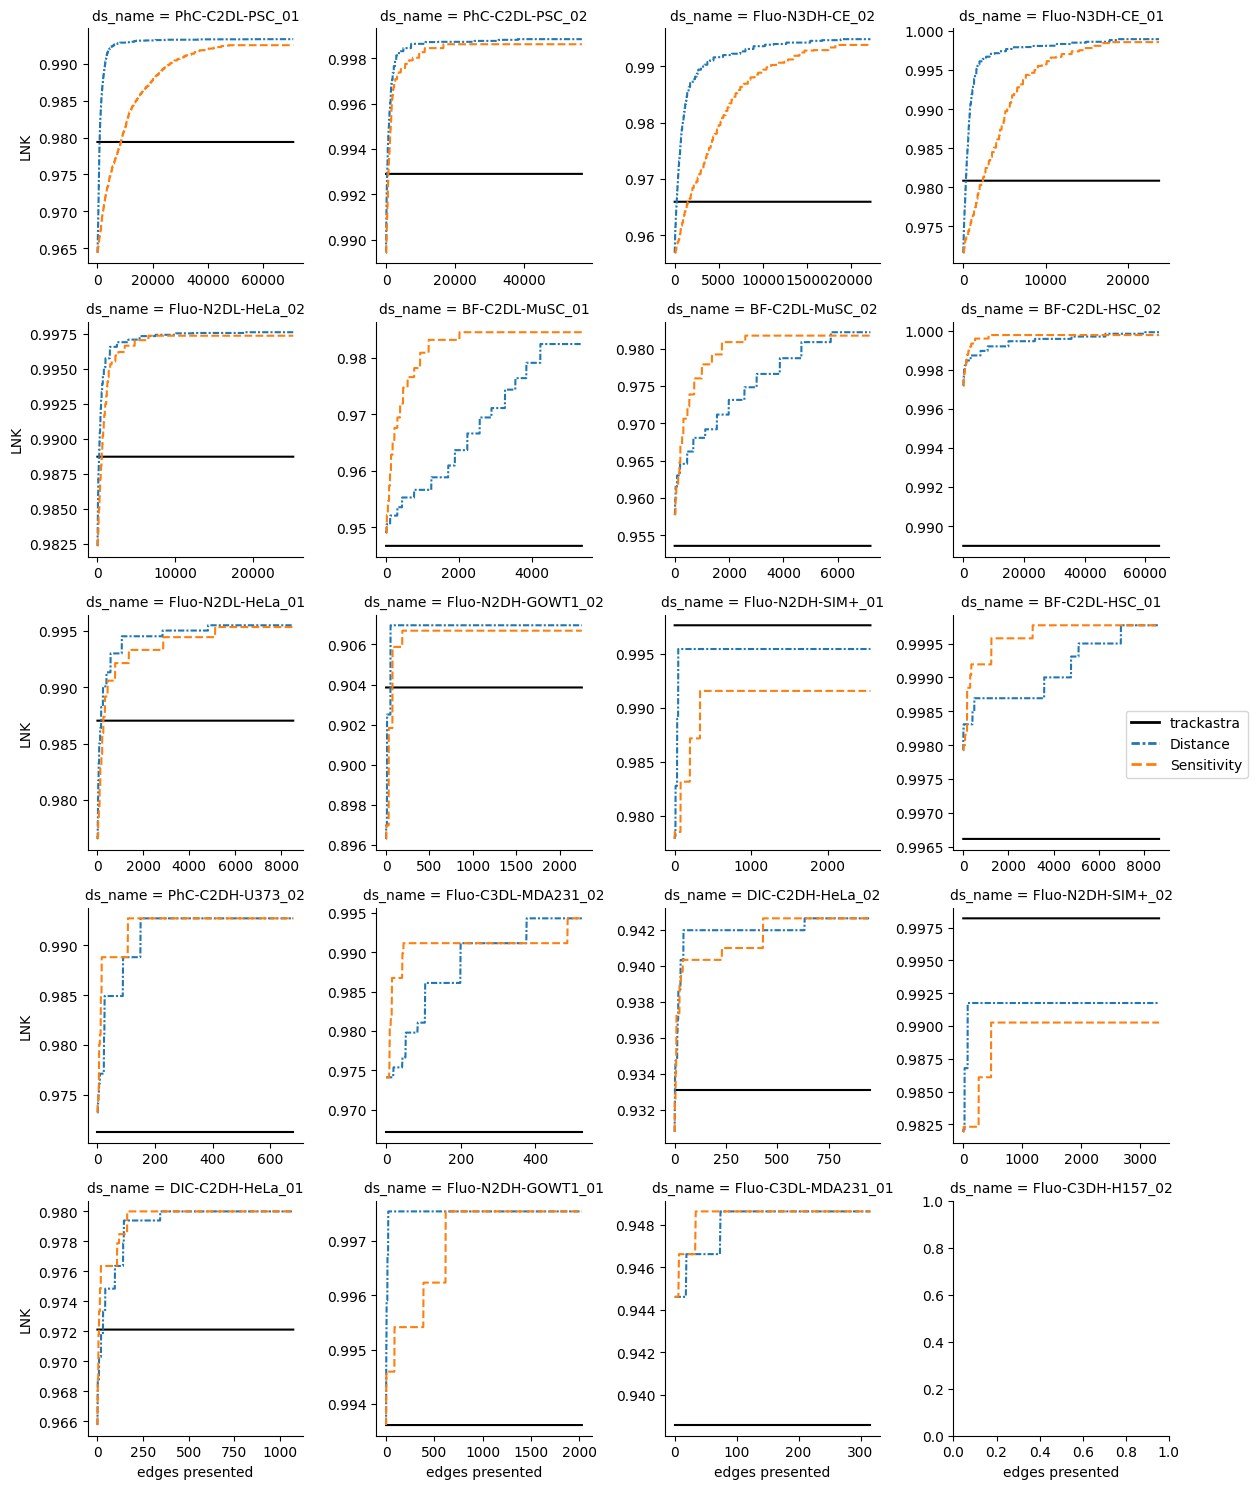

In [27]:
from matplotlib.lines import Line2D
import numpy as np
import seaborn as sns

grid = sns.FacetGrid(all_df, col='ds_name', col_wrap=4, sharex=False, sharey=False, col_order=plot_order)
grid.map_dataframe(sns.lineplot, x='distance_edges_presented', y='trackastra_LNK', color='black')

grid.map_dataframe(sns.lineplot, x='distance_ws_edges_presented', y='distance_ws_LNK', color=sns.color_palette()[0], linestyle=(0, (3, 1, 1, 1)))
grid.map_dataframe(sns.lineplot, x='sensitivity_diff_ws_edges_presented', y='sensitivity_diff_ws_LNK', color=sns.color_palette()[1], linestyle='--')


# Create custom legend labels
custom_lines = [
    Line2D([0], [0], color='black', lw=2),
    Line2D([0], [0], color=sns.color_palette()[0], lw=2, linestyle=(0, (3, 1, 1, 1))),
    Line2D([0], [0], color=sns.color_palette()[1], lw=2, linestyle='--'),
]

# Add legend to the figure
grid.figure.legend(custom_lines, ['trackastra', 'Distance', 'Sensitivity'], loc='center right', bbox_to_anchor=(1.05, 0.5))
grid.set_xlabels('edges presented')
grid.set_ylabels('LNK')

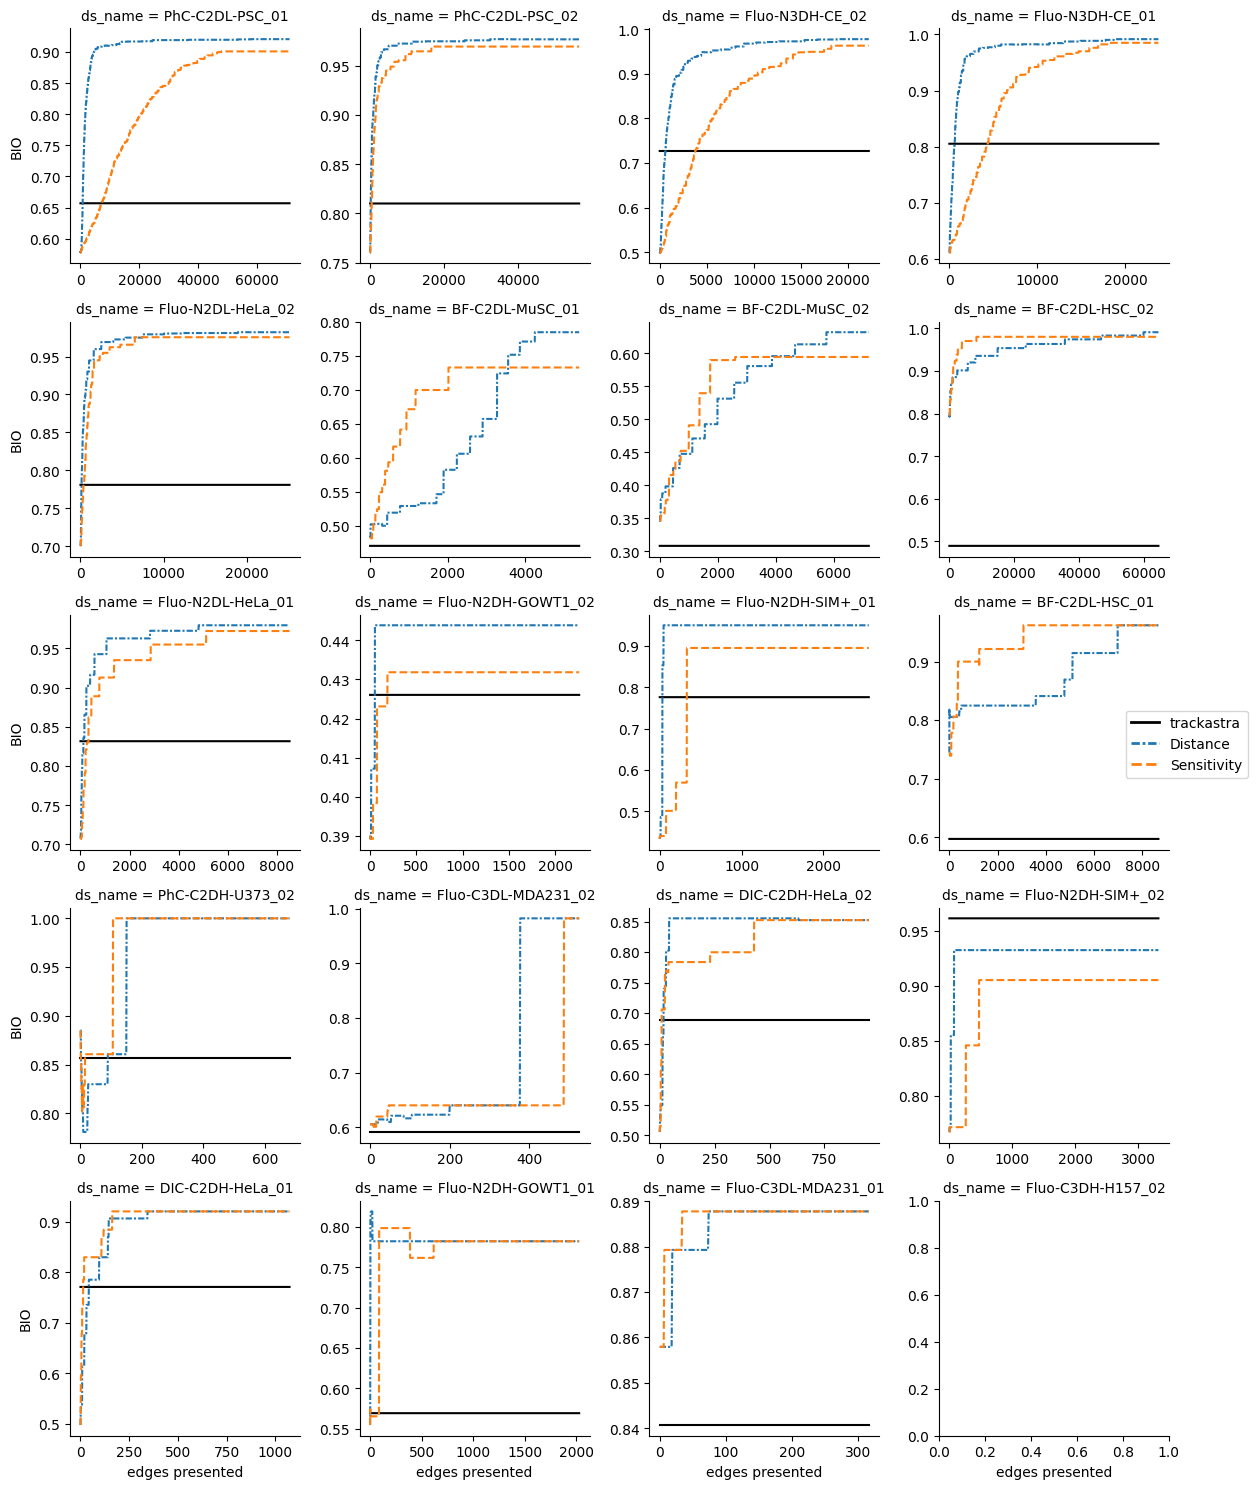

In [28]:
from matplotlib.lines import Line2D
import numpy as np
import seaborn as sns

grid = sns.FacetGrid(all_df, col='ds_name', col_wrap=4, sharex=False, sharey=False, col_order=plot_order)
grid.map_dataframe(sns.lineplot, x='distance_edges_presented', y='trackastra_BIO(0)', color='black')

grid.map_dataframe(sns.lineplot, x='distance_ws_edges_presented', y='distance_ws_BIO(0)', color=sns.color_palette()[0], linestyle=(0, (3, 1, 1, 1)))
grid.map_dataframe(sns.lineplot, x='sensitivity_diff_ws_edges_presented', y='sensitivity_diff_ws_BIO(0)', color=sns.color_palette()[1], linestyle='--')


# Create custom legend labels
custom_lines = [
    Line2D([0], [0], color='black', lw=2),
    Line2D([0], [0], color=sns.color_palette()[0], lw=2, linestyle=(0, (3, 1, 1, 1))),
    Line2D([0], [0], color=sns.color_palette()[1], lw=2, linestyle='--'),
]

# Add legend to the figure
grid.figure.legend(custom_lines, ['trackastra', 'Distance', 'Sensitivity'], loc='center right', bbox_to_anchor=(1.05, 0.5))
grid.set_xlabels('edges presented')
grid.set_ylabels('BIO')